<a href="https://colab.research.google.com/github/raymond98tan/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Raymond_Tan_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [40]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

# Mean
def mean (sales):
  sales_total = 0
  for i in sales:
    sales_total += i
  return sales_total/len(sales)

# Variance of sample
# Use return numerator/(len(sales)) for variance of a sample
def variance (sales):
  numerator = 0
  for i in sales:
    #print (numerator)
    numerator += (i - mean(sales))**2
    
  return numerator/(len(sales)-1)

# Standard Deviation
stddev = variance(sales)**(1/2)

print(mean(sales))
print(variance(sales))
print(stddev)


3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use library functions for calculating the covariance since we didn't specifically talk about its formula)

In [13]:
customers = [127, 80, 105, 92, 120, 115, 93] 
m = np.array([sales, customers])
covar = np.cov(m=m)

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [14]:
customers_total = 0
for item in customers:
  customers_total += item
mean = customers_total/len(customers)
customer_variance = 0
for item in customers:
  customer_variance += (item - mean)**2
customer_variance = customer_variance/(len(customers)-1)
customer_stddev = customer_variance**(1/2)

correlation = covar/(stddev*customer_stddev)

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [15]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [16]:
df.cov()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [17]:
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

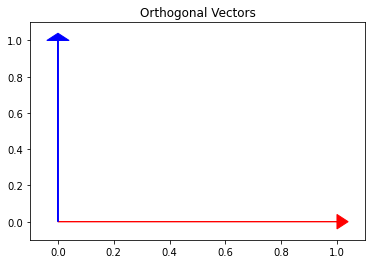

In [39]:
v1 = np.array([1,0])
v2 = np.array([0,1])
origin = np.array([0,0])

plt.arrow(0,0,1,0, head_width=0.08, head_length=0.04, color='r')
plt.arrow(0,0,0,1, head_width=0.08, head_length=0.04, color='b')

plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)

plt.title("Orthogonal Vectors")
plt.show()

<font color=red>A synonym for orthogonal is perpendicular</font>

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [19]:
a = np.array([-5,3,7])
b = np.array([6,-8,2])
np.dot(a,b)

-40

<font color=red>These vectors are not orthogonal. The dot product of two vectors will always be zero if those vectors are orthogonal.</font>

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [20]:
c = [2,-15,6,20]
c = np.array(c)
print(np.linalg.norm(c), 'the norm length')
print(np.dot(c,c), 'the dot product')
print(np.transpose(c)*c, 'c transpose times c')

25.787593916455254 the norm length
665 the dot product
[  4 225  36 400] c transpose times c


In [21]:
665**(1/2)

25.787593916455254

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

In [22]:
d = np.array([7,12])
e = np.array([2,11,-8])

print(np.linalg.norm(d))
print(np.linalg.norm(e))

13.892443989449804
13.74772708486752


<font color=red>\begin{align}
 d = 13.9\begin{bmatrix} 7/13.9 \\ 12/13.9 \end{bmatrix}
 \qquad
e = 13.7\begin{bmatrix} 2/13.7 \\ 11/13.7 \\ -8/13.7 \end{bmatrix}
\end{align}</font>

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [24]:
f = np.array([4,12,11,9,2])

# unit vector pointing in the direction f does
f_hat = f/np.linalg.norm(f) 

f_hat

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

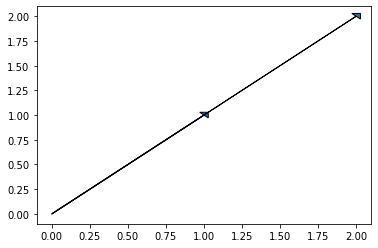

In [37]:
# linearly dependent vectors
plt.arrow(0,0,1,1, head_width=0.08, head_length=0.04)
plt.arrow(0,0,2,2, head_width=0.08, head_length=0.04)

plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)

plt.show()

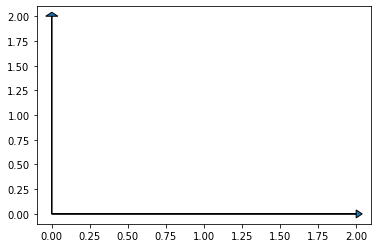

In [26]:
# linearly independent vectors
plt.arrow(0,0,0,2, head_width=0.08, head_length=0.04)
plt.arrow(0,0,2,0, head_width=0.08, head_length=0.04)
plt.xlim(-0.1,2.1)
plt.ylim(-0.1,2.1)
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

<font color=red>This spans $\mathbb{R}$. h = 4g</font>

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [32]:
l = [1, 2, 3]
m = [-1, 0, 7]
n = [4, 8, 2]
m = np.array([l,m,n])
print(np.linalg.matrix_rank(m))

3


<font color=red>The span of $\{l, m, n\}$ is $\mathbb{R}^3$. (any vector that lies in 3d space)</font>

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



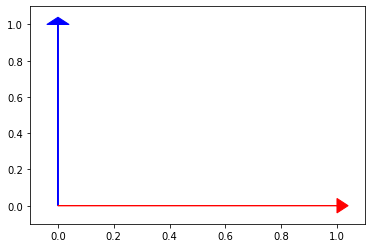

In [31]:
# Basis Vectors in R2
plt.arrow(0,0,0,1, head_width=0.08, head_length=0.04, color='b')
plt.arrow(0,0,1,0, head_width=0.08, head_length=0.04, color='r')
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.show()

## 6.2 What does it mean to form a basis?

<font color=red>A basis is formed when a set of vectors can be used in linear combinations to form any other vector which could exist in the space the set exists in.</font>

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [28]:
P = np.array([[1, 2, 3], [-1, 0, 7], [4, 8, 2]])
print(np.linalg.matrix_rank(P), 'is the rank of matrix P')

3 is the rank of matrix P


## 7.2 What does the rank of a matrix tell us?

<font color=red>The rank tells us that the vectors form a basis whose span has dimensions equal to its rank.</font>

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [29]:
v = np.array([1, 3])
w =np.array([-1, 2])
proj = (np.dot(w , v) / np.dot(v, v)) * v

proj

array([0.5, 1.5])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


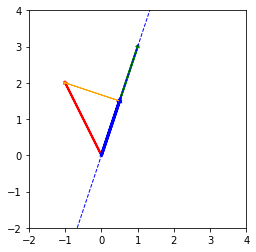

In [30]:
# Get values to show projection line
x_minus_proj = w-proj

# Axis Bounds
plt.xlim(-2,4)          
plt.ylim(-2,4)

# Set axes
axes = plt.gca()
plt.axes().set_aspect('equal')

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 3*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, v[0], v[1], linewidth=2, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=2, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(proj[0], proj[1], x_minus_proj[0], x_minus_proj[1], linewidth=1, head_width=.05, head_length=0.05, color = 'orange')

plt.show()

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

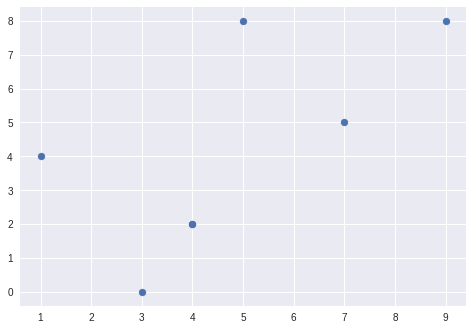

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()